# Importing Required Libraries

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [185]:
df = pd.read_csv('tweets.csv', encoding='latin1')
df.columns = ['Target', 'Id', 'Date_Time', 'Flag', 'User', 'Text']
df

,Target,Id,Date_Time,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Data Shape

In [186]:
df.shape

(1599999, 6)

## Explaing Target
Target represents - (0 = negative,4 = positive)

In [187]:
targets = df.Target.unique().tolist()
targets

[0, 4]

# Data Visualization

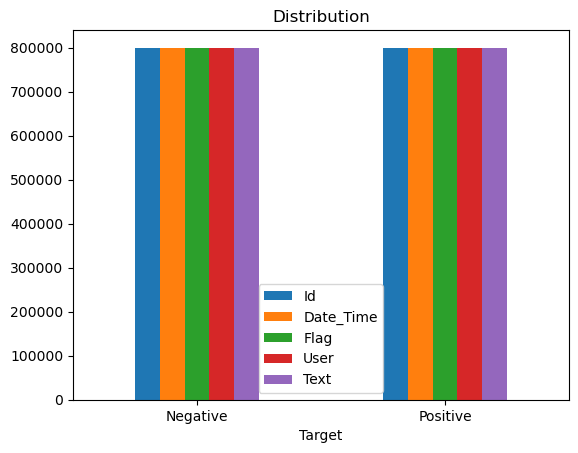

In [188]:
ax = df.groupby('Target').count().plot(kind = 'bar', title = 'Distribution')
ax.set_xticklabels(['Negative', 'Positive'], rotation = 0)
text, sentiment = list(df.Text), list(df.Target)

<Axes: xlabel='Target', ylabel='count'>

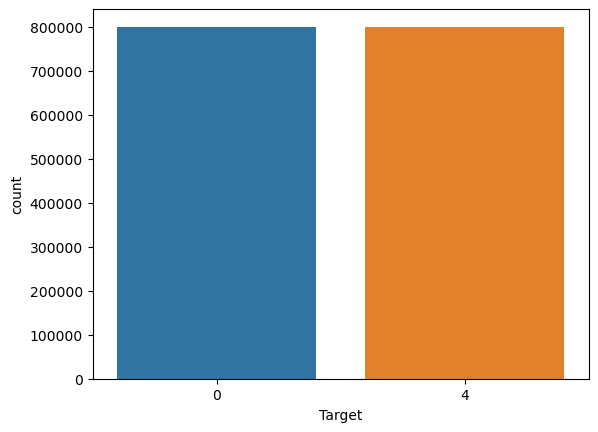

In [189]:
sns.countplot(x = 'Target', data = df)

# Data Cleaning

## Choosing relevant Data

In [190]:
valid_df = df[['Text', 'Target']]
valid_df

,Text,Target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


## Representing Neagative as 0 and Positive as 1

In [194]:
valid_df.loc[valid_df['Target'] == 4, 'Target'] = 1
valid_df

,Text,Target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


## Separating Dataset

In [195]:
positive = valid_df[valid_df.Target == 1]
negative = valid_df[valid_df.Target == 0]
print(negative.head())
print()
print(positive.head())

                                                Text  Target
0  is upset that he can't update his Facebook by ...       0
1  @Kenichan I dived many times for the ball. Man...       0
2    my whole body feels itchy and like its on fire        0
3  @nationwideclass no, it's not behaving at all....       0
4                      @Kwesidei not the whole crew        0

                                                     Text  Target
799999       I LOVE @Health4UandPets u guys r the best!!        1
800000  im meeting up with one of my besties tonight! ...       1
800001  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800002  Being sick can be really cheap when it hurts t...       1
800003    @LovesBrooklyn2 he has that effect on everyone        1


## Merging two dataset

In [196]:
dataset = pd.concat([positive, negative])
dataset

,Text,Target
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800002,Being sick can be really cheap when it hurts t...,1
800003,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
799994,Sick Spending my day laying in bed listening ...,0
799995,Gmail is down?,0
799996,rest in peace Farrah! So sad,0
799997,@Eric_Urbane Sounds like a rival is flagging y...,0


## Removing Stop-words

In [204]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
def clean_stopWords(text) :
    return " ".join([word for word in str(text).split() if word not in stop_words])
dataset.Text = dataset.Text.apply(lambda text: clean_stopWords(text))
dataset.Text.head()

799999              I LOVE @Health4UandPets u guys r best!!
800000    im meeting one besties tonight! Cant wait!! - ...
800001    @DaRealSunisaKim Thanks Twitter add, Sunisa! I...
800002    Being sick really cheap hurts much eat real fo...
800003                      @LovesBrooklyn2 effect everyone
Name: Text, dtype: object

## Conversion of Dataset

In [205]:
vectorizer = TfidfVectorizer(max_features=500000)  # Experiment with the number of features
X = vectorizer.fit_transform(dataset['Text'])
y = dataset['Target']

# Splitting Dataset into test and train

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparing Different Models

## Naive Bayes

In [209]:
nv = MultinomialNB(alpha=1.0)  # Experiment with different values of alpha
nv.fit(X_train, y_train)
y_pred1 = nv.predict(X_test)

### Evaluating Model

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77    160506
           1       0.78      0.74      0.76    159494

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



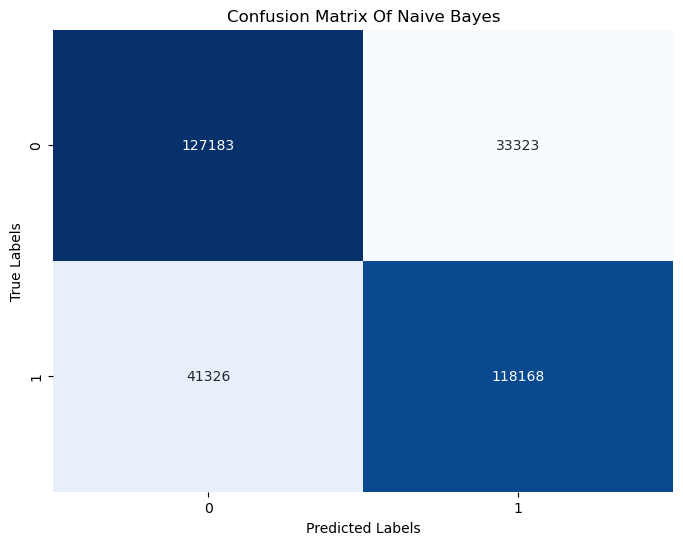

In [210]:
print(f"Classification Report:\n {classification_report(y_test, y_pred1)}")
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Of Naive Bayes')
plt.show()

## Logistic Regression

In [211]:
lr = LogisticRegression(max_iter=1000, solver='lbfgs') 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Evaluating Model

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78    160506
           1       0.78      0.81      0.79    159494

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



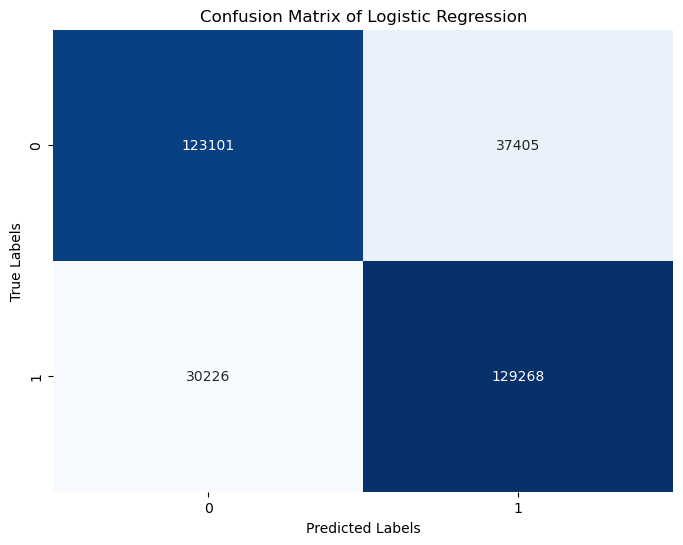

In [212]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# Making Predictions

In [225]:
user_input = input("Enter a string: ")
cleaned_text = user_input
vectorized_text = vectorizer.transform([cleaned_text])
prediction = lr.predict(vectorized_text)
sentiment = "Positive" if prediction == 1 else "Negative"
print(f"The sentiment of the text '{new_text}' is predicted as {sentiment}.")

Enter a string: It is terrible
The sentiment of the text 'This is a great movie. I loved it!' is predicted as Negative.
